## Download a csv from a jupyter notebook

```python
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Introduction

This first project is an introduction to ``pandas``, the most popular data-management tool in Python.

Pandas is our swiss knife when it comes to Data Analysis/Science in Python. We use it to:

- **Load/dump read/write data**: to and from different formats (CSV, XML, HTML, Excel, JSON, even from the Internet)
- **Analyze data**: perform statistical analysis, query the data, find inconsistencies, etc
- **Data cleaning**: finding missing values, duplicate data, invalid or broken values, etc
- **Visualizations**: with support from ``matplotlib``, we can quickly visualize data
- **Data Wrangling/Munging**: a non-so-scientific term that involves data handling: merging multiple data sources, creating derived representations, grouping data, etc.

In this project you will not learn much about how to use Pandas, but you'll see it in action. So, don't worry if you don't feel comfortable "doing" what's shown here, it'll all be explained in the following projects.

Let's get started! Switch to the next page and start your lab!

## Loading the data

Have you started your lab? If you haven't yet, please go ahead and start the lab. Also, execute the first couple of cells:

```python
import pandas as pd
df = pd.read_csv("s&p500.csv", index_col='Date', parse_dates=True)
df.head()
df.tail()
```

We first start importing the ``pandas`` library, and as we use it SO much, we like to create a short alias ``pd``. We then load the sample dataset for this project: the S&P500 index from 2017 to 2022.

We load the data using the ``read_csv`` method. Throughout these labs, you'll see that pandas can load data from a lot of different formats, and methods are usually ``read_XXX``; for example: ``read_json``, ``read_excel``, ``read_xml``, etc.

We've now loaded the data contained in the CSV into the variable ``df``: a DataFrame. DataFrames are the key data structure used by Pandas and you'll see A LOT of them in the following projects; so, don't worry too much about it for now.

Then, we take a few quick peeks at the data with the ``.head()`` and ``.tail()`` methods. This is because pandas is prepared to handle MILLIONS of rows (or even more). So we don't usually "print" the whole data, we just take quick peeks at it.

The ``.head()`` method shows the first 5 rows, the ``.tail()`` method shows the last 5 rows. You can immediately see that the DataFrame looks pretty much like an Excel table. It contains an index, which is the date of the reading.

In [2]:
import pandas as pd

df = pd.read_csv("SP500 index 2017 2022.csv", index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
2022-12-29,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000
2022-12-30,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000


## Analyzing data

The analysis phase is of course dependant of the task at hand, and the data at hand. This is just an example of the capabilities of pandas.

We start by using the ``.describe()`` method, that provides quick summary statistics of the whole DataFrame. We have information like the ``mean`` (the average), ``max``, etc.

We can also get specific information for a single column: ``df['Close'].min()`` or ``df['Close'].max()``. Oh, by the way, you've just seen how to perform "single column selection": ``df['Close'].head()``.

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,3283.215944,3301.894648,3262.660734,3283.391821,3283.391821,4.096083e+09
std,716.906855,722.545366,710.808656,716.838804,716.838804,1.054008e+09
min,2251.570068,2263.879883,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,2713.589966,2729.655090,2697.770020,2712.177429,2712.177429,3.418972e+09
50%,3006.380005,3016.780029,2991.500000,3005.584961,3005.584961,3.858670e+09
75%,3919.070007,3945.934998,3892.040039,3916.182434,3916.182434,4.526435e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


Single column statistics

In [6]:
df['Close'].min()

2237.39990234375

In [7]:
df['Close'].max()

4796.56005859375

Single column selection:

In [8]:
df['Close'].head()

Date
2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
Name: Close, dtype: float64

## Visualizations

Pandas makes it simple to visualize data with the ``.plot()`` method. In reality, ``.plot()`` is just a wrapper around ``matplotlib``, the de-facto plotting library for Python.

As you can see, plotting a column is very easy; just: ``df['Close'].plot()``.

You can see that we're creating more advanced visualizations by combining multiple columns or by creating statistical visualizations (box plots, histograms, etc).

<Axes: title={'center': 'S&P Closing Price | 2017 - 2022'}, xlabel='Date'>

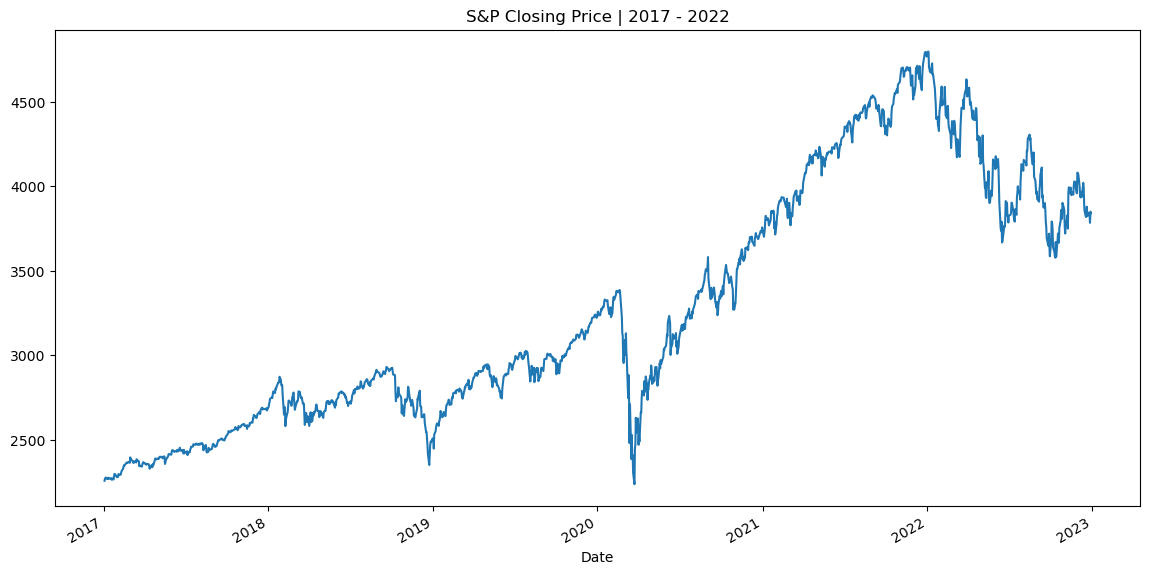

In [9]:
df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

A more advanced chart combining ``Close Price`` and ``Volume``:

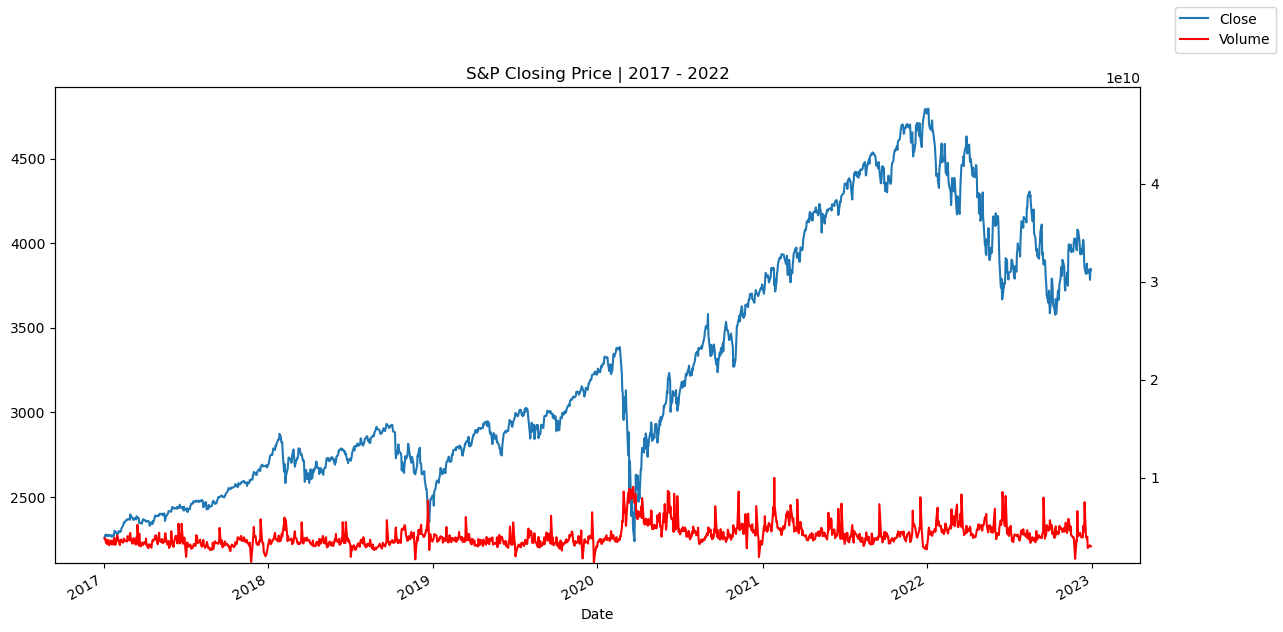

In [10]:
ax1 = df['Close'].plot(figsize=(14, 7), title='S&P Closing Price | 2017 - 2022')

ax2 = ax1.twinx()
df['Volume'].plot(ax=ax2, color='red', ylim=[df['Volume'].min(), df['Volume'].max() * 5])

ax1.figure.legend(["Close", "Volume"])

A few statistical visualizations.

A histogram:

<Axes: ylabel='Frequency'>

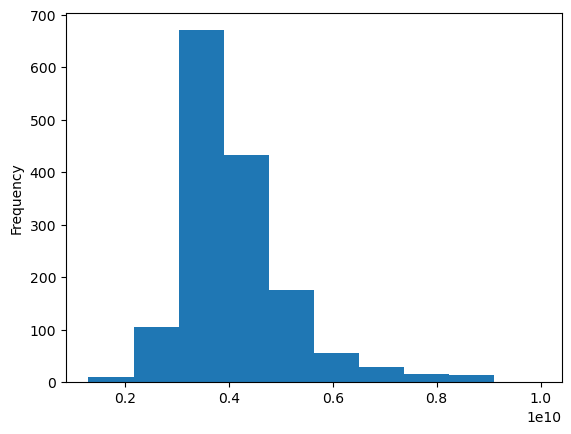

In [11]:
df['Volume'].plot(kind='hist')

A box plot:

<Axes: >

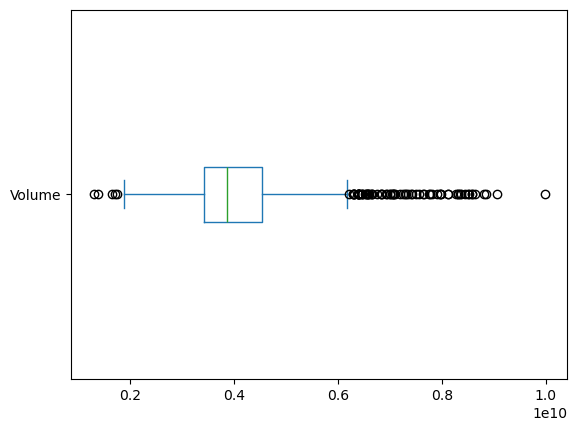

In [12]:
df['Volume'].plot(kind='box', vert=False)

## Data Wrangling

Pandas excels at Data Wrangling/handling/munging. We can perform a ton of operations, like combining datasets, grouping, melting, creating pivot tables, etc. We have an entire Skill Track just dedicated to Data Wrangling, so you can guess how powerful it is.

For now, we'll focus on just a few simple operations. We'll calculate [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands) for our S&P500 data.

Bollinger bands are just a simple visualization/analysis technique that creates two bands, one "roof" and one "floor" of some "support" for a given time series. The reasoning is that, if the time series is "below" the "floor", it's a historic low, and if it's "above" the "roof", it's a historic high. In terms of stock prices and other financial instruments, when the price crosses a band, it's said to be too cheap or too expensive.

> **This is definitively NOT investment advice. Bollinger bands have proved to be INACCURATE, so don't use them in real life. This is just for educational purposes.**

A Bollinger band is defined as two standard deviations above/below the Simple Moving Average. Those are a lot of concepts, but basically we can first define the Simple Moving Average, using the ``.rolling(WINDOW).mean()`` method (switch to the lab to follow along).

Understanding the SMA is outside of the scope of this project, but it's basically a "smoothing" method. You see how the SMA *follows* the Close Price, but without so much volatility.

Now, to define the bands we need to calculate 2 standard deviations above/below the price:

```python
df['Lower Band'] = df['Close SMA'] - (2 * df['Close'].rolling(60).std())
df['Upper Band'] = df['Close SMA'] + (2 * df['Close'].rolling(60).std())
```

The final result should look something like:

In [13]:
df['Close SMA'] = df['Close'].rolling(60).mean()

Comparamos el nuevo SMA con el valor de cierre de la acción

In [14]:
df[['Close', 'Close SMA']].tail(10)

,Close,Close SMA
Date,,
2022-12-16,3852.360107,3835.480680
2022-12-19,3817.659912,3837.554513
2022-12-20,3821.620117,3840.330847
2022-12-21,3878.439941,3844.183346
2022-12-22,3822.389893,3845.905843
2022-12-23,3844.820068,3849.311678
2022-12-27,3829.250000,3853.372176
2022-12-28,3783.219971,3855.118677
2022-12-29,3849.280029,3856.091178


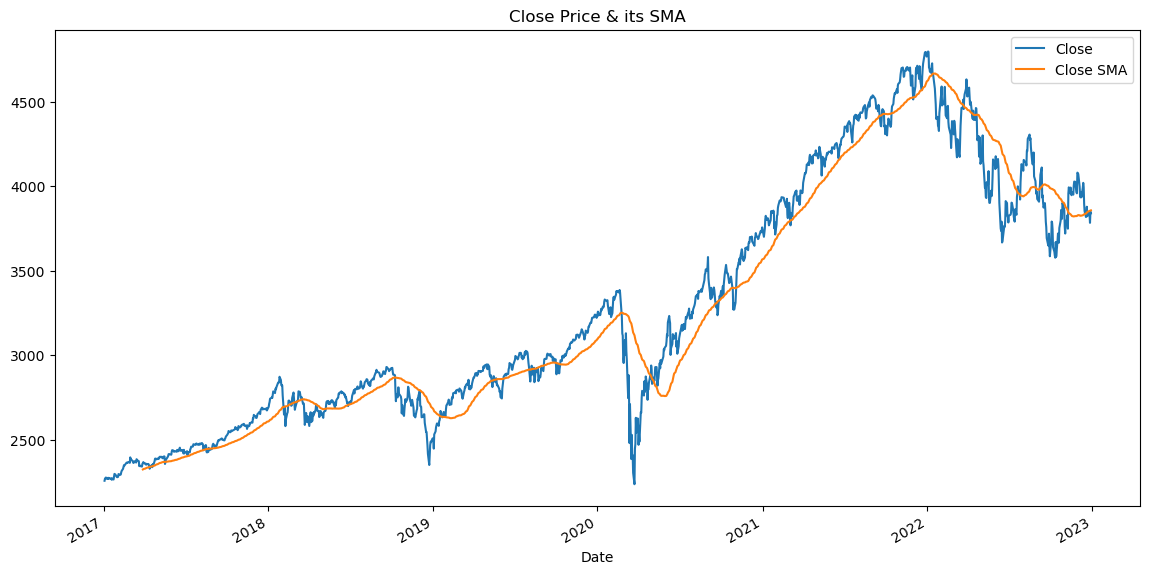

In [15]:
ax = df[['Close', 'Close SMA']].plot(figsize=(14,7), title='Close Price & its SMA')

Calcularemos las bandas de Bollinger

In [16]:
df['Lower Band'] = df['Close SMA'] - (2 * df['Close'].rolling(60).std())
df['Upper Band'] = df['Close SMA'] + (2 * df['Close'].rolling(60).std())

In [17]:
df[['Close', 'Close SMA', 'Lower Band', 'Upper Band']].tail()

,Close,Close SMA,Lower Band,Upper Band
Date,,,,
2022-12-23,3844.820068,3849.311678,3571.779081,4126.844275
2022-12-27,3829.250000,3853.372176,3584.540551,4122.203801
2022-12-28,3783.219971,3855.118677,3589.568713,4120.668641
2022-12-29,3849.280029,3856.091178,3591.070590,4121.111766
2022-12-30,3839.500000,3857.028178,3592.658018,4121.398338


<Axes: title={'center': 'Close Price & its SMA'}, xlabel='Date'>

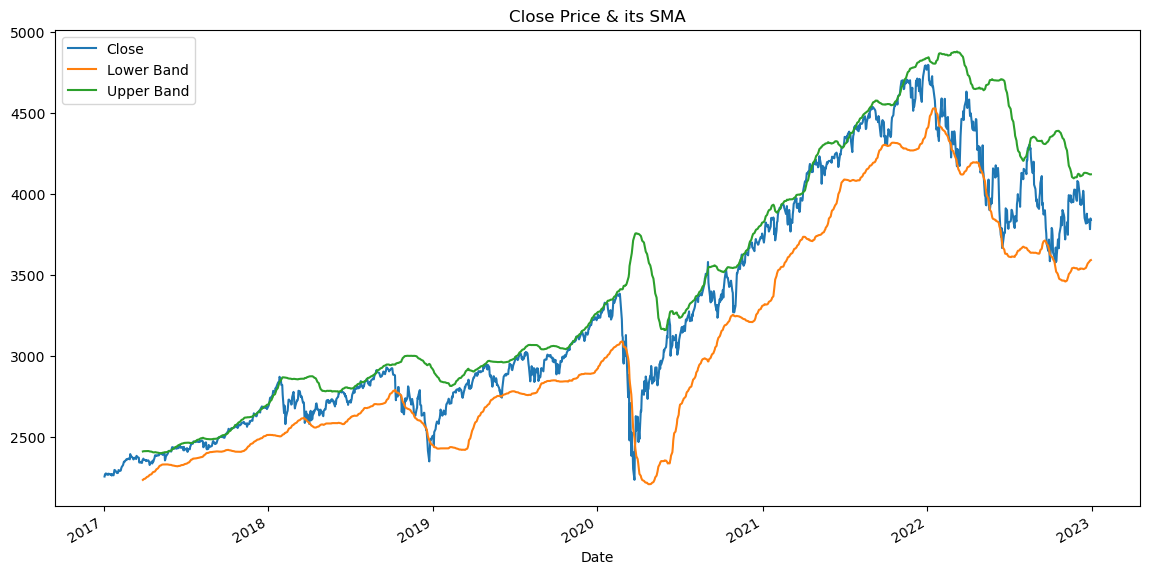

In [19]:
df[['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14,7), title='Close Price & its SMA')

Ahora encontraremos los puntos bajos que cruzan la banda baja

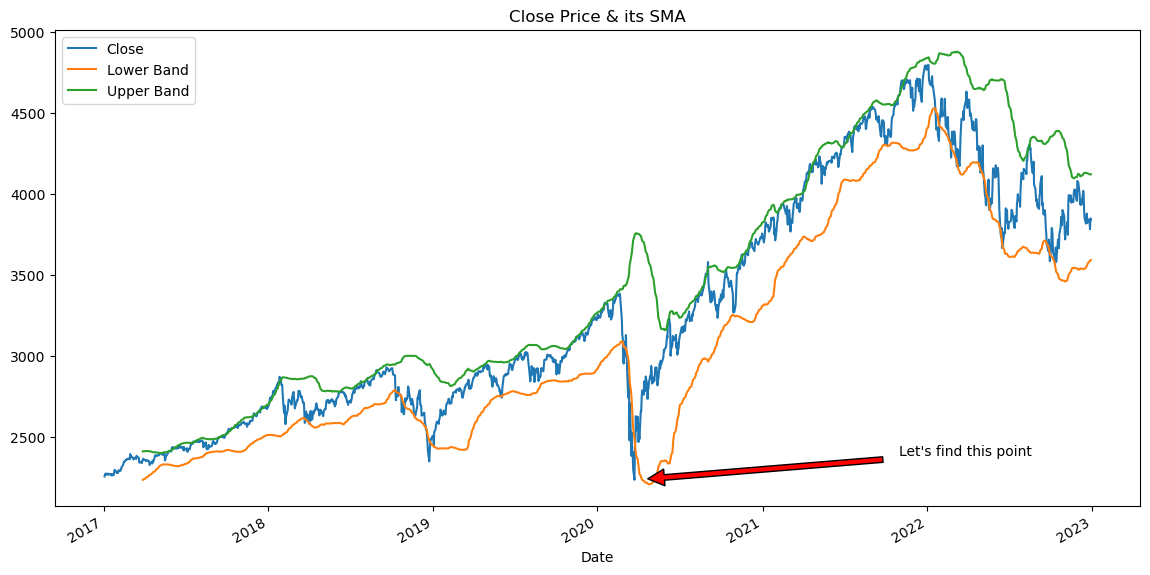

In [24]:
ax = df[['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA')
ax.annotate(
    "Let's find this point", xy=(pd.Timestamp("2020-03-23"), 2237), 
    xytext=(0.9, 0.1), textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='right', verticalalignment='bottom');

Podemos hacer un query de todas las fechas que cruzaron la banda baja en el periodo ``2020-03-01`` a ``2020-06-01`` 

In [25]:
df.loc['2020-03-01': '2020-06-01'].query("Close < `Lower Band`").head()

,Open,High,Low,Close,Adj Close,Volume,Close SMA,Lower Band,Upper Band
Date,,,,,,,,,
2020-03-03,3096.459961,3136.719971,2976.629883,3003.370117,3003.370117,6376510000,3243.278988,3047.952727,3438.605248
2020-03-05,3075.699951,3083.040039,2999.830078,3023.939941,3023.939941,5579290000,3241.457658,3040.082062,3442.833254
2020-03-06,2954.199951,2985.929932,2901.540039,2972.370117,2972.370117,6555240000,3238.731160,3027.363341,3450.098980
2020-03-09,2863.889893,2863.889893,2734.429932,2746.560059,2746.560059,8441290000,3232.298494,2987.011382,3477.585607
2020-03-10,2813.479980,2882.590088,2734.000000,2882.229980,2882.229980,7642040000,3227.975163,2967.512632,3488.437694


Y podemos hacer un zoom también a ese periodo

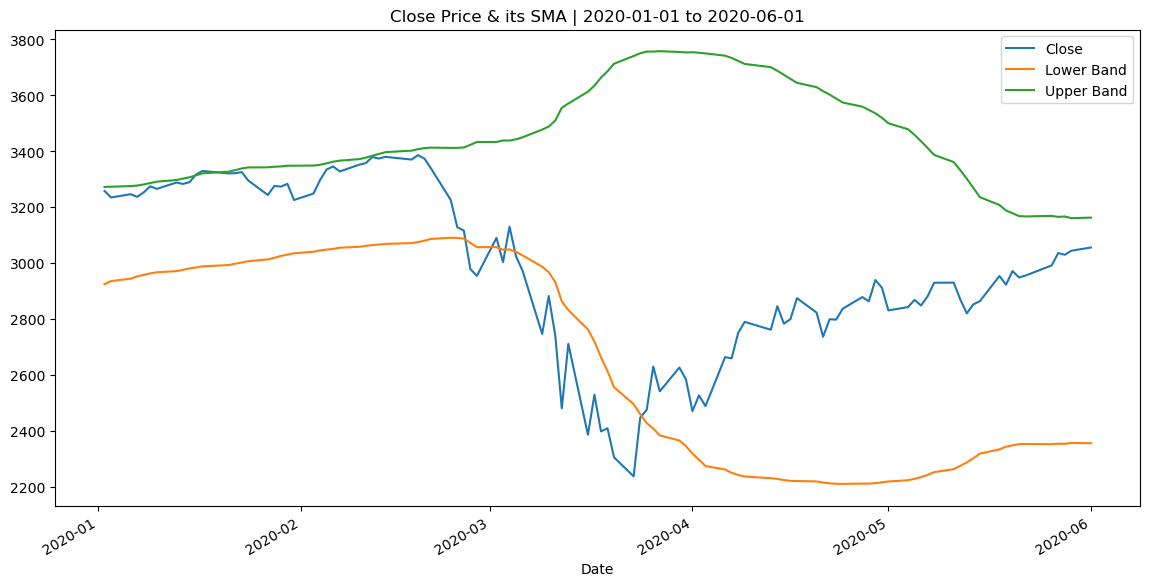

In [27]:
df.loc['2020-01-01': '2020-06-01', ['Close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA | 2020-01-01 to 2020-06-01');

# Series Practice with World Bank's data

## Introduction

In this lab, you will use pandas to explore the World Bank's data on economic, political, and social indicators for countries around the world. The data is collected from Kaggle.

The World Bank data is organized into a number of different categories, including:

- Economy: This category includes data on GDP, population, inflation, and unemployment.
- Government: This category includes data on government spending, taxes, and debt.
- Social: This category includes data on education, health, and poverty.

The data is stored in excel file named ``world_data.xls``. In this lab, you will learn how to:

- Create pandas series
- Series basic attributes, such as shape, size, and data type
- Access data in pandas series
- Perform basic statistical operations on pandas series

By the end of this lab, you will be able to use pandas to explore and analyze the World Bank's data on economic, political, and social indicators for countries around the world.

> ***Run all the cells that are under Take a look at raw data heading in the notebook.***

Let's get dive into the lab!

In [29]:
import pandas as pd
df = pd.read_csv('world_data.csv')
df.head()

,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.7,NaN,75.5,97.513962,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.9,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.3,53.4%,60.4,23.873850,0.073278
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.4,50.0%,52.3,60.744801,0.373074
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.3,27.3%,77.8,96.769691,0.271050


In [30]:
df.columns

Index(['Country Name', 'Region Code', 'Country Code',
       'GDP, PPP (current international $)', ' Population, total ',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)'],
      dtype='object')

Creating a pandas series from a dataframe df

In [31]:
# Converting columns to pandas series
country_name = pd.Series(df['Country Name'])
country_code = pd.Series(df['Country Code'])
population = pd.Series(df[' Population, total '])
gdp = pd.Series(df['GDP, PPP (current international $)'])
internet_users = pd.Series(df['Internet users (per 100 people)'])
life_expectancy = pd.Series(df['2014 Life expectancy at birth, total (years)'])
literacy_rate = pd.Series(df['Literacy rate, adult female (% of females ages 15 and above)'])
exports = pd.Series(df['Exports of goods and services (% of GDP)'])

In [32]:
country_name.head()

0          Aruba
1        Andorra
2    Afghanistan
3         Angola
4        Albania
Name: Country Name, dtype: object

In [33]:
country_code.head()

0    ABW
1    AND
2    AFG
3    AGO
4    ALB
Name: Country Code, dtype: object

In [34]:
population.head()

0        103,889 
1         70,473 
2     32,526,562 
3     25,021,974 
4      2,889,167 
Name:  Population, total , dtype: object

In [35]:
gdp.head()

0                  NaN
1                  NaN
2      62,912,669,167 
3     184,437,662,368 
4      32,663,238,936 
Name: GDP, PPP (current international $), dtype: object

In [36]:
internet_users.head()

0    88.7
1    96.9
2     8.3
3    12.4
4    63.3
Name: Internet users (per 100 people), dtype: float64

In [37]:
life_expectancy.head()

0    75.5
1     NaN
2    60.4
3    52.3
4    77.8
Name: 2014 Life expectancy at birth, total (years), dtype: float64

In [38]:
literacy_rate.head()

0    97.513962
1          NaN
2    23.873850
3    60.744801
4    96.769691
Name: Literacy rate, adult female (% of females ages 15 and above), dtype: float64

In [39]:
exports.head()

0         NaN
1         NaN
2    0.073278
3    0.373074
4    0.271050
Name: Exports of goods and services (% of GDP), dtype: float64

1. What is the data type of the ``country_name`` series

Al ser ``dtype('O')` sabemos que el tipo de datos es **Objeto** 

In [43]:
country_name.dtype

dtype('O')

2. What is the ``size`` of the gdp series

In [46]:
gdp.shape

(264,)

3. What is the data type of the ``internet_users`` series

In [47]:
internet_users.dtype

dtype('float64')

4. What is the value of the first element in the ``population`` series

In [56]:
population.iloc[0]

' 103,889 '

5. What is the value of the last element in the ``life_expectancy`` series

In [55]:
life_expectancy.iloc[-1]

57.5

6. What is the value of the element with index 29 in the ``literacy_rate`` series

In [57]:
literacy_rate.iloc[29]

95.4420318603516

7. What is the value of the last element in the ``gdp`` series

In [58]:
gdp.iloc[-1]

' 27,984,877,195 '

8. What is the mean of the ``internet_users`` series

In [59]:
internet_users.mean()

47.557258064516134

9. What is the standard deviation of the ``internet_users`` series

In [60]:
internet_users.std( )

27.690496399160466

10 What is the median of the ``exports`` series

In [61]:
exports.median()

0.30183071080490154

11. What is the minimum value in the ``life_expectancy`` series

In [62]:
life_expectancy.min()

48.9

12. What is the ``average`` literacy rate of all countries

In [63]:
literacy_rate.mean()

80.91936549162253

13. Sort the series in ascending order

In [64]:
country_name_sorted = country_name.sort_values(ascending=True)

14. Sort multiple series at once

    Both the series ``country_name`` and ``literacy_rate`` have the same number of elements and the elements are in the same order with respect to index number. Arrange the country name as per ascending order of literacy rate. Assign the result of country name to new variable called ``country_name_sorted_by_literacy_rate`` and the result of literacy rate to new variable called ``literacy_rate_sorted``.

    Example: If the country name is ``['India', 'China', 'Japan']`` and literacy rate is ``[80, 90, 70]``, then the result should be ``['Japan', 'India', 'China']`` and ``[70, 80, 90]``.

In [65]:
literacy_rate_sorted = literacy_rate.sort_values(ascending=True)
country_name_sorted_by_literacy_rate = country_name.loc[literacy_rate_sorted.index]

# Intro to Pandas Series

## Intro

That is a lot to unpack. Let's better use an example. Take a look at the following "table" that contains a list of Top Companies (in technology) and their revenue (in millions of dollars):


Preview
A pandas Series will help us represent that data. Now it's time to turn on the lab and head to the Notebook, where we'll see how Series work.

The syntax to create a series is:

```python
import pandas as pd
pd.Series(data, index, name="A name")
```

``Series``s main components are:

- **data**: this is the data that we want to represent, and obviously, we could say the "most important" component of the series. In our example, the data is the revenue of the companies.

- **index**: the index indicates the "labels" of the data we're storing. We'll use the index to "reference" the data later. Indices are not required; pandas will assign a default sequential index if we don't provide one.

- **name**: a series can contain a "name"; this will make more sense when we start using DataFrames. For now, just think about it as extra "documentation"; more clarity when working with your code. *Names are optional*.

Finally, it's important to note that Series are "strongly typed": this means they have an associated (**an enforced object type**). It's not like in Python dictionaries, where we can mix types. In this case, you'll see that the series is of type int64 (it says dtype: int64 after the name, at the bottom of the representation). Don't worry too much about it for now, it's basically a Series containing "integers".

We'll represent them using a Series in the following way:

In [27]:
companies = [
    'Apple', 'Samsung', 'Alphabet', 'Foxconn',
    'Microsoft', 'Huawei', 'Dell Technologies',
    'Meta', 'Sony', 'Hitachi', 'Intel',
    'IBM', 'Tencent', 'Panasonic'
]

s = pd.Series([
    274515, 200734, 182527, 181945, 143015,
    129184, 92224, 85965, 84893, 82345,
    77867, 73620, 69864, 63191],
    index=companies,
    name="Top Technology Companies by Revenue")

s

Apple                274515
Samsung              200734
Alphabet             182527
Foxconn              181945
Microsoft            143015
Huawei               129184
Dell Technologies     92224
Meta                  85965
Sony                  84893
Hitachi               82345
Intel                 77867
IBM                   73620
Tencent               69864
Panasonic             63191
Name: Top Technology Companies by Revenue, dtype: int64

1. **Check your knowledge: create a series**

    Create a series under the variable ``my_series`` that contains three elements ``9``, ``11`` and -``5``. The index of the series should be ``['a', 'b', 'c']`` and the name should be ``"My First Series"``.


In [2]:
import pandas as pd

In [3]:
elements = [9,11,-5]
index = ['a', 'b', 'c']
name = 'My First Series'
my_series = pd.Series(elements, index=index, name= name)

In [4]:
my_series

a     9
b    11
c    -5
Name: My First Series, dtype: int64

## Basic selection and location

Series are very flexible about querying/selecting data. You can get data by the index (get the revenue of Apple), by position (get the 5th element) and also by multiple of those.

### Selecting by index

We use the Series' index to reference and locate the data associated with a given label.

For example, to get the revenue of *Apple*, we can do: ``s["Apple"]``. That works, as you can see in the notebook. But you'll also see that we use a ``.loc`` attribute, making it: ``s.loc["Apple"]``. This is the preferred method to reference values. It might make little sense for now, but it will once we start dealing with DataFrames.

In [6]:
s['Apple']

274515

``.loc`` is the preferred way:

In [7]:
s.loc['Apple']

274515

### Selecting by position

We can also select elements by their "order". After all, as we mentioned in the previous section, **Series are ordered data structures**. So we can select an element by its position: for example, the 'first", "last", "third", or "253rd" element. To select an element by its position, we use the ``.iloc`` attribute. The beauty of ``.iloc`` is that, as selection in Python lists, it accepts negative numbers to reference elements from the end of the series. That means that ``.iloc[-1]`` returns the **LAST** element in the series.

In [8]:
s.iloc[0]

274515

In [9]:
s.iloc[-1]

63191

### Errors in selection


As expected, if you try to retrieve an element that doesn't exist, it'll cause an error. This works pretty similarly as in Python dictionaries and lists. Selecting by index (.loc) fails with a ``KeyError`` (like dictionaries) and selecting by position fails with an ``IndexError`` as with lists.

Most of the time, you can prevent these errors using the membership operator ``in``, which checks if a given element is part of the index.

In [10]:
# this code will fail
s.loc["Non existent company"]

KeyError: 'Non existent company'

In [11]:
# This code also fails, 132 it's out of boundaries
# (there are not so many elements in the Series)
s.iloc[132]

IndexError: single positional indexer is out-of-bounds

We could prevent these errors using the membership check ``in``:

In [12]:
'Apple' in s

True

In [13]:
'Snapchat' in s

False

### Multiple selection

So far, Series look like glorified dictionaries. But this single feature will set them apart.

> **With both, index selection and positional selection, you can pass multiple elements to be returned. This is extremely convenient.**

Pay attention to the value returned: another Series, a "sub-series," we could say, only with the values requested. In Pandas you'll see this pattern everywhere: Series selection returns other series, DataFrames selection (in future lessons) returns other DataFrames or other Series, etc.

Let's see it in action. To select several elements (by index/label), we just pass a list of the labels:

```py
s.loc[["Apple", "Intel", "Sony"]]
```

To select multiple values by position, we also pass a list with the positions:

```py
s.iloc[[0, 5, -1]]
```

In [14]:
s.loc[['Apple', 'Intel', 'Sony']]

Apple    274515
Intel     77867
Sony      84893
Name: Top Technology Companies by Revenue, dtype: int64

In [15]:
s.iloc[[0, 5, -1]]

Apple        274515
Huawei       129184
Panasonic     63191
Name: Top Technology Companies by Revenue, dtype: int64

## Activities

2. **Check your knowledge: location by index**

    Select the revenue of ``Intel`` and store it in a variable named ``intel_revenue``:

In [19]:
intel_revenue = s.loc['Intel']

3. **Check your knowledge: location by position**

    Select the revenue of the "second to last" element in our series ``s`` and store it in a variable named ``second_to_last``:

In [20]:
second_to_last = s.iloc[-2]

4. **Check your knowledge: multiple selection**

    Use multiple label selection to retrieve the revenues of the companies:

    - Samsung
    - Dell Technologies
    - Panasonic
    - Microsoft

In [22]:
sub_series = s.loc[["Samsung", 'Dell Technologies', "Panasonic", 'Microsoft']]
sub_series

Samsung              200734
Dell Technologies     92224
Panasonic             63191
Microsoft            143015
Name: Top Technology Companies by Revenue, dtype: int64

## Series Attributes and Methods

Series contain a lot of useful attributes and methods to interact with them. Probably the two most common ones you'll see all the time are ``.head()`` and ``.tail()``. This just returns 5 elements either from the beginning of the series (``.head()``) or from the end of it (``.tail()``). This is useful when you're working with real data (possibly MILLIONS of values). You can also pass a number of elements to return: ``.head(3)`` and ``.tail(2)``.

In [23]:
s.head()

Apple        274515
Samsung      200734
Alphabet     182527
Foxconn      181945
Microsoft    143015
Name: Top Technology Companies by Revenue, dtype: int64

In [24]:
s.tail()

Hitachi      82345
Intel        77867
IBM          73620
Tencent      69864
Panasonic    63191
Name: Top Technology Companies by Revenue, dtype: int64

### Main attributes

Once a series is constructed (somehow), we can access all the attributes separately. Namely:

- The data of the series: using the ``.values`` attribute
- The index: using ``.index``
- The name: using ``.name``
- The type assigned: using ``.dtype``
- The number of elements: using ``.size``

In [25]:
s.values

array([274515, 200734, 182527, 181945, 143015, 129184,  92224,  85965,
        84893,  82345,  77867,  73620,  69864,  63191], dtype=int64)

In [26]:
s.index

Index(['Apple', 'Samsung', 'Alphabet', 'Foxconn', 'Microsoft', 'Huawei',
       'Dell Technologies', 'Meta', 'Sony', 'Hitachi', 'Intel', 'IBM',
       'Tencent', 'Panasonic'],
      dtype='object')

In [27]:
s.name

'Top Technology Companies by Revenue'

In [28]:
s.dtype

dtype('int64')

In [29]:
s.size

14

``len`` also works

In [30]:
len(s)

14

### Statistical methods

But that's not all about attributes and Series. As you might already know, we use Pandas for data processing. And a significant component of data processing is understanding its statistical implications.

The ``.describe()`` method gives you quick summary statistics of your series.

There are also individual methods for each of the values returned by ``.describe()``: ``.max()``, ``.min()``, ``.mean()``, ``.median()``, etc.

There's also a ``quantile()`` method to check for specific quantiles (or percentiles). For example, to get the 75th percentile, you can use: ``s.quantile(.75)``.

## Activities

In [31]:
# Run this cell to complete the activity
american_companies = s[[
    'Meta', 'IBM', 'Microsoft',
    'Dell Technologies', 'Apple', 'Intel', 'Alphabet'
]]
american_companies

Meta                  85965
IBM                   73620
Microsoft            143015
Dell Technologies     92224
Apple                274515
Intel                 77867
Alphabet             182527
Name: Top Technology Companies by Revenue, dtype: int64

We have selected a "sub-series" of only american companies in the variable ``american_companies``. Using that Series, complete the following activities.

5. **What's the average revenue of American Companies?**

    What's the average revenue of the companies contained in the variable ``american_companies``? Enter the whole number (that is, without decimals).

In [32]:
american_companies.mean()

132819.0

6. **What's the median revenue of American Companies?**

In [33]:
american_companies.median()

92224.0

## Sorting Series

Sorting series is extremely simple. This is another great feature of pandas in general.

But with Sorting, we'll introduce two important concepts:

### Sorting by values or Index

First, what are we sorting by? The values? Or the index? Well, we'll be able to sort by both attributes: using the ``.sort_values()`` and ``.sort_index()`` methods.

Check the examples in the notebook. To sort the values of the series (that is, the revenue), we use the ``.sort_values()`` method. To sort the series by its index (in this case, lexicographically by the company's name, we use the ``.sort_index()`` method). The default sorting method is in "ascending" order. To sort in descending order, you must pass the ``ascending=False`` parameter (to either method).

7. **What company has the largest revenue?**

    Using all the companies (stored in the Series in ``s``), which company has the largest revenue?

In [45]:
s.sort_values(ascending=False)[:1]

Apple    274515
Name: Top Technology Companies by Revenue, dtype: int64

8. **Sort company names lexicographically. Which one comes first?**

    Using all the companies (stored in the Series in ``s``), which name is the "first" one in lexicographic (*or alphabetical*) order. That is, ``aa`` comes before than ``ab``.

In [47]:
s.sort_index(ascending=True)[:1]

Alphabet    182527
Name: Top Technology Companies by Revenue, dtype: int64

## Inmutability

The second important concept is **immutability**, and this is NOT just a Series concept; it's a widespread concept in pandas and Data Science in general. In this case, you'll see that when we "sort a series", **we don't ACTUALLY sort the series itself**. There's a NEW series returned. The underlying series has NOT changed; it has NOT been mutated.

This is a CRUCIAL concept in Data Science in general. We don't want to change/mutate things, as it's harder to keep track of these changes.

If by any chance, you DO want to mutate your series, in this case, you want to sort it and alter the underlying series (in ``s`` in this case), you must pass the ``inplace=True`` attribute. When doing so, you'll see that this time the method doesn't return anything, but the underlying series (in s has changed) to contain the data in the order required.

Again, immutability is both preferred and encouraged, so try to use immutable methods as much as possible. For example, it is fine to create a second variable with the values sorted (``s_sorted_values``) and without changing ``s``.

In [5]:
s.head()

Apple        274515
Samsung      200734
Alphabet     182527
Foxconn      181945
Microsoft    143015
Name: Top Technology Companies by Revenue, dtype: int64

We will sort the series by revenue, ascending, and we'll mutate the original one. Notice how the method doesn't return anything:

In [6]:
s.sort_values(inplace=True)

But now the series is sorted by revenue in ascending order:

In [7]:
s.head()

Panasonic    63191
Tencent      69864
IBM          73620
Intel        77867
Hitachi      82345
Name: Top Technology Companies by Revenue, dtype: int64

We'll now sort the series by index, mutating it again:

In [9]:
s.sort_index(inplace=True)

In [10]:
s.head()

Alphabet             182527
Apple                274515
Dell Technologies     92224
Foxconn              181945
Hitachi               82345
Name: Top Technology Companies by Revenue, dtype: int64

## Activities

9. **Sort American Companies by Revenue**

    Create a new variable ``american_companies_desc`` that contains the results of sorting ``american_companies`` by revenue (this is, by value) in descending order.

In [14]:
# Run this cell to complete the activity
american_companies = s[[
    'Meta', 'IBM', 'Microsoft',
    'Dell Technologies', 'Apple', 'Intel', 'Alphabet'
]]

In [15]:
american_companies_desc = american_companies.sort_values(ascending=False)
american_companies_desc

Apple                274515
Alphabet             182527
Microsoft            143015
Dell Technologies     92224
Meta                  85965
Intel                 77867
IBM                   73620
Name: Top Technology Companies by Revenue, dtype: int64

10. **Sort (and mutate) international companies**
    
    Now it's time to do what we told you NOT to do, but we need practice it. There's a new series defined named international_companies. Your task is to sort them by Revenue in **descending order** (larger to smaller) but doing it in place, that is, modifying the series.

    If you make a mistake, you can always re-run the cell that generates the Series.

In [16]:
# Run this cell to complete the activity
international_companies = s[[
    "Sony", "Tencent", "Panasonic",
    "Samsung", "Hitachi", "Foxconn", "Huawei"
]]
international_companies

Sony          84893
Tencent       69864
Panasonic     63191
Samsung      200734
Hitachi       82345
Foxconn      181945
Huawei       129184
Name: Top Technology Companies by Revenue, dtype: int64

In [17]:
international_companies.sort_values(ascending=False, inplace=True)
international_companies.head()

Samsung    200734
Foxconn    181945
Huawei     129184
Sony        84893
Hitachi     82345
Name: Top Technology Companies by Revenue, dtype: int64

## Modifying Series

Modifying series is something we hardly want to do. As mentioned in the previous section, we try to be "immutable". So changing series is usually not recommended.

But still, it's possible to modify series by changing values, adding or removing elements. This works in the same way as with Python dictionaries.

For example, to modify an existing value, we can just "step over it", let's say we want to set IBM's revenue to $0. We can just do:

```py
s['IBM'] = 0
```
To add elements (or change the value of an element), you can just use the index of the new element: ``s['Tesla'] = 21450``.

To remove an element, we use the del keyword and the index: ``del s["Apple"]``.

Again, these are the same ways we use to add/remove elements from dictionaries.

Modifying values:

In [18]:
s['IBM']  = 0

In [19]:
s.sort_values().head()

IBM              0
Panasonic    63191
Tencent      69864
Intel        77867
Hitachi      82345
Name: Top Technology Companies by Revenue, dtype: int64

Adding elements:

In [20]:
s['Tesla'] = 21450

In [21]:
s.sort_values().head()

IBM              0
Tesla        21450
Panasonic    63191
Tencent      69864
Intel        77867
Name: Top Technology Companies by Revenue, dtype: int64

11. **Insert Amazon's Revenue**

    Insert a new element in our series ``s``, Amazon with a total revenue of: ``$469,822`` (million dollars).

In [22]:
s['Amazon'] = 469822

12. **Delete the revenue of Meta**

    Remove the entry for Meta from the series ``s``.

In [23]:
del s['Meta']

## Concatenating Series (immutable)

Finally, if you want to "concatenate" two series, you can use the ``concat()`` method ``s.concat(dataframe1 or series1, dataframe2 or series2)`` as shown in the example in the notebook. In this case, the method returns a new series or dataframe with the values of the two series/dataframe concatenated.

In [24]:
another_s = pd.Series([21_450, 4_120], index=['Tesla', 'Snapchat'])

In [25]:
another_s

Tesla       21450
Snapchat     4120
dtype: int64

In [26]:
s_new = pd.concat([s, another_s])

In [27]:
s

Alphabet             182527
Apple                274515
Dell Technologies     92224
Foxconn              181945
Hitachi               82345
Huawei               129184
IBM                       0
Intel                 77867
Microsoft            143015
Panasonic             63191
Samsung              200734
Sony                  84893
Tencent               69864
Tesla                 21450
Amazon               469822
Name: Top Technology Companies by Revenue, dtype: int64

In [28]:
s_new

Alphabet             182527
Apple                274515
Dell Technologies     92224
Foxconn              181945
Hitachi               82345
Huawei               129184
IBM                       0
Intel                 77867
Microsoft            143015
Panasonic             63191
Samsung              200734
Sony                  84893
Tencent               69864
Tesla                 21450
Amazon               469822
Tesla                 21450
Snapchat               4120
dtype: int64

# Series Practice with S&P Companies Market Cap

## Introduction

Now it's time to put all you've learned about series to a test. Let's start by introducing the data we'll be working with. Make sure you've started your lab, and the Notebook is on the right panel.

For this project, we'll be working with the "market capitalization" of S&P500 (short for "Standard and Poor's 500") companies. The S&P 500 is a free-float, capitalization-weighted index of the top 500 publicly listed stocks in the US (top 500 by market cap). To put it simply: a list of the "most valuable companies in US Markets".

> **Disclaimer: the data is outdated. As you might know, markets change very rapidly.**

But this project has a twist. We will be using two series instead of one that we'll read from two different datasets. The first one is the stock symbols of companies. For example, Apple, Inc. stock symbol is ``AAPL`` (usually styled $AAPL). Facebook's symbol is ``FB`` ($FB).

The second dataset contains the market cap of each company by its symbol. For example, the market cap of ``AAPL`` (Apple Inc.) is ``$809,508,034,020``.

The first thing you'll see in the Notebook is a preview of the underlying datasets we're using: ``sp500-symbols.csv`` and ``sp500-marketcap.csv``. Next, we use the ``head`` Linux command to peek at each file's first five lines.

We then import pandas (``import pandas as pd``) and load the data into series using the ``read_csv`` method. Don't worry about it yet! We'll use A LOT of ``read_csv`` during this track, so you'll get pretty used to it soon.

At the end of those operations, you'll have two series containing the data we'll be working with. One is ``market_cap`` (that includes market cap by symbol), and the other is ``symbols`` that contain the names of the companies and their stock symbol.

Take a few minutes to familiarize yourself with both Series, and then let's get started!


In [2]:
import pandas as pd

In [3]:
market_cap = pd.read_csv("sp500-marketcap.csv", index_col="Symbol")['Market Cap']
market_cap.head()

Symbol
MMM     138721055226
AOS      10783419933
ABT     102121042306
ABBV    181386347059
ACN      98765855553
Name: Market Cap, dtype: int64

In [4]:
symbols = pd.read_csv("sp500-symbols.csv", index_col="Name")['Symbol']
symbols.head()

Name
3M Company              MMM
A.O. Smith Corp         AOS
Abbott Laboratories     ABT
AbbVie Inc.            ABBV
Accenture plc           ACN
Name: Symbol, dtype: object

## Basic Series Attributes

We'll start by doing a simple *reconnaissance* of the series we're working with.

1. **Name of the market_cap Series**

    What's the name of the series contained in the ``market_cap`` variable?

In [5]:
market_cap.name

'Market Cap'

2. **Name of the symbols Series**

    What's the name of the series contained in the ``symbols`` variable?

In [6]:
symbols.name

'Symbol'

3. **What's the dtype of ``market_cap``**
    
    What's the dtype of the series contained in the ``market_cap`` variable?

In [7]:
market_cap.dtype

dtype('int64')

4. **What's the dtype of ``symbols``**

    What's the dtype of the series contained in the symbols variable?

In [8]:
symbols.dtype

dtype('O')

5. **How many elements do the series have?**

    How many elements ``market_cap`` series contains?

In [9]:
len(market_cap)

505

6. **What's the minimum value for Market Cap?**

In [10]:
market_cap.min()

2626102121

7. **What's the maximum value for Market Cap?**

In [11]:
market_cap.max()

809508034020


8. **What's the average Market Cap?**

    Find the average value for Market Cap, and enter it WITHOUT decimals. Just the integer number (if you find the average is 1948.88, just enter 1948).

In [12]:
market_cap.mean()

49239436929.50495

9. **What's the median Market Cap?**

    Find the median value for Market Cap, and enter it WITHOUT decimals. Just the integer number (if you find the median is 1948.0, just enter 1948).

In [13]:
market_cap.median()

21400952517.0

## Selection and Indexing

Now it's time to do practice some selection and indexing using Series. We'll start with some basic activities with each series, and by the end we'll be using both of them.

10. **What's the symbol of ``Oracle Corp``.?**

In [14]:
symbols.loc['Oracle Corp.']

'ORCL'

11. **What's the Market Cap of ``Oracle Corp.``?**

In [15]:
market_cap.loc['ORCL']

202302349740

12. **What's the Market Cap of ``Wal-Mart Stores``?**

In [16]:
market_cap.loc[symbols.loc['Wal-Mart Stores']]

304680931618

13. **What's the symbol of the 129th company?**

In [17]:
symbols.iloc[128]

'STZ'

14. **What's the Market Cap of the 88th company in ``symbols``?**

Warning! The companies might be out of order... so the 88th company in ``symbols`` might not be the same as the 88th one in ``market_cap``. We need you to find the 88th company in ``symbols`` first, and then the the Market Cap from ``market_cap`` for that particular symbol.

In [18]:
market_cap.loc[symbols.iloc[87]]

13467193376

15. **Create a new series only with FAANG Stocks**

    There's a common term in investing (and in tech) which is FAANG companies. This refers to "big tech" companies by their acronyms. For example, ``FAANG`` means the following companies: Facebook Apple Amazon Netflix and Google (read more about FAANG and Big Tech in Wikipedia).

    > Here FAANG refers to acronym of few companies but there are other big tech companies like Microsoft. So, the term FAANG is not a strict definition of big tech companies.

    Your task is to create a new series, under the variable ``faang_market_cap``, containing the market cap of the following companies:

    - ``Amazon.com Inc``
    - ``Apple Inc.``
    - ``Microsoft Corp.``
    - ``Alphabet Inc Class A`` (this is Google's main stock)
    - ``Facebook, Inc.``
    - ``Netflix Inc.``

    **Important**! The stocks must be in THIS order. You will need to find the Symbols of the companies first.

    Also important, as stated above, you MUST create a variable containing your new series. Your code should look something like:

    ``faang_market_cap = ... # your code``
    
    There's a way to combine everything in a one-liner. Try to solve this task without looking at the solution; but after you've finished it, take a peak at it because there's a neat trick explained at the end of the solution.

In [19]:
market_cap.sort_values(ascending=False).head(8)

Symbol
AAPL     809508034020
GOOGL    733823966137
GOOG     728535558140
MSFT     689978437468
AMZN     685873374731
FB       523423036576
JPM      386613611000
JNJ      353062464971
Name: Market Cap, dtype: int64

In [20]:
faang_market_cap = pd.Series([market_cap.loc[symbols['Amazon.com Inc']],
                              market_cap.loc[symbols['Apple Inc.']],
                              market_cap.loc[symbols['Microsoft Corp.']],
                              market_cap.loc[symbols['Alphabet Inc Class A']],
                              market_cap.loc[symbols['Facebook, Inc.']],
                              market_cap.loc[symbols['Netflix Inc.']]
                              ], index= [symbols['Amazon.com Inc'],
                                         symbols['Apple Inc.'],
                                         symbols['Microsoft Corp.'],
                                         symbols['Alphabet Inc Class A'],
                                         symbols['Facebook, Inc.'],
                                         symbols['Netflix Inc.']])

In [21]:
faang_market_cap

AMZN     685873374731
AAPL     809508034020
MSFT     689978437468
GOOGL    733823966137
FB       523423036576
NFLX     114805404842
dtype: int64

One neat trick with Pandas is that we can use the values of one series to select elements from another series. So we could have just done:

In [22]:
faang_market_cap2 = market_cap[symbols[["Amazon.com Inc", "Apple Inc.", "Microsoft Corp.", "Alphabet Inc Class A", "Facebook, Inc.", "Netflix Inc.", ]]]

In [23]:
faang_market_cap2

Symbol
AMZN     685873374731
AAPL     809508034020
MSFT     689978437468
GOOGL    733823966137
FB       523423036576
NFLX     114805404842
Name: Market Cap, dtype: int64

16. **Select the market cap of companies in position 1st, 100th, 200th, etc.**

    The S&P500 index contains 500 companies. Create a variable ``position_companies`` that contains the market cap of the companies in the positions:

    - 1st
    - 100th
    - 200th
    - 300th
    - 400th
    - 500th
    
    **Important!** This selection should be done under ``market_cap``. Don't use ``symbols`` for this particular activity.

In [29]:
position_companies = market_cap.iloc[[0,99,199,299,399,499]]
position_companies

Symbol
MMM    138721055226
CTL     18237196861
FL       5819080328
MAT      5843402350
ROP     27247789759
XL      10753423590
Name: Market Cap, dtype: int64

## Sorting Series

17. **What's the 4th company sorted lexicographically by their symbol?**

    Use the ``symbols`` series to sort **the symbols** in lexicographical order (ascending). Which company (the name, the index value) appears in the 4th position? Note: the answer is the full company name. For example, the full name of ``MSFT`` (Microsoft) is ``Microsoft Corp.``, as it appears in the index. The correct answer would be Microsoft Corp.. By the way, Microsoft is definitively NOT the correct answer.

In [51]:
symbols.sort_values(ascending=True).head()

Name
Agilent Technologies Inc       A
American Airlines Group      AAL
Advance Auto Parts           AAP
Apple Inc.                  AAPL
AbbVie Inc.                 ABBV
Name: Symbol, dtype: object

18. **What's the Market Cap of the 7th company (in descending order)?**

Using the ``market_cap`` series, sort the companies by their symbol in lexicographical order in **descending mode** and enter the revenue of the 7th company.

In [63]:
market_cap.sort_index(ascending=False)[:7]

Symbol
ZTS     35991109776
ZION    10670678640
ZBH     24454698119
YUM     27003303098
XYL     12915021000
XRX      7938833340
XRAY    13390513478
Name: Market Cap, dtype: int64

# Practice Series Filtering

## Introduction

In this lab, we will practice filtering with conditionals and sorting on pandas series using dataset that contains information about international cricket players who have played since 2002. The data includes the player's name, number of innings they have played, number of runs they have scored, number of balls they have faced, number of times they have been dismissed, their batting average, their strike rate, their highest score, number of fours they have hit, number of sixes they have hit, number of times they have scored a half-century, and number of times they have scored a century.

Below are the columns of the dataset:

- Player: Name of the player
- I: Number of innings played
- R: Number of runs scored
- B: Number of balls faced
- Outs: Number of times dismissed
- Avg: Batting average
- SR: Strike rate
- HS: Highest score
- 4s: Number of fours hit
- 6s: Number of sixes hit
- 50: Number of times scored a half-century
- 100: Number of times scored a century

Let's get started with the lab now!

In [1]:
import pandas as pd

In [ ]:
data = pd.read_csv